In [1]:
# 각 속성별 빈도수 데이터 : 리스트로 가져오기

# 속성별로 분류한 텍스트 데이터에서 딕셔너리 가져오는 함수 
def get_dict(file):
    with open(file,'r',encoding='UTF8') as f:
        sents = []
        while True:
            line = f.readline()
            if not line: # '' 의 길이는 1, 컨텐츠가  없을 때는 0
                break
            sents.append(line.strip().replace(",","").replace("'","").replace("(","").replace(")","").split())
        
        fdist = dict()
        
        for sent in sents:
            fdist[sent[0]] = int(sent[1])
        
        sorted(fdist.items(), key=lambda x: x[1]) # 빈도수 높은 순서대로 내림차순 정렬
        
        return fdist

#데이터 저장
health = get_dict('./data/health.txt')
quality_stability = get_dict('./data/quality&stability.txt')
price = get_dict('./data/price.txt')
flavor = get_dict('./data/flavor.txt')
brand = get_dict('./data/brand.txt')

In [2]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/a시월구일1.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 임포트
import matplotlib.pyplot as plt

In [3]:
# bar-chart 함수 만들기
def get_bar(data,title,color):
    
    x, y = zip(*list(data.items())[:7])


    plt.bar(range(7),y, align='center',color=color) # y축, 빈도수
    plt.xticks(range(7), x) # x축

    plt.xlabel('keywords', fontsize=18) 
    plt.ylabel('frequency', fontsize=18)
    plt.title(title)
    plt.show()

In [4]:
health_color = '#F5ECCE'
quality_stability_color = '#5BD3EF'
flavor_color = '#F6CECE'
price_color = '#CEF6CE'
brand_color = '#E3CEF6'

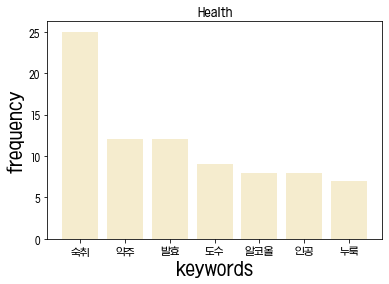

In [5]:
#  Health
get_bar(health,"Health",'#F5ECCE')

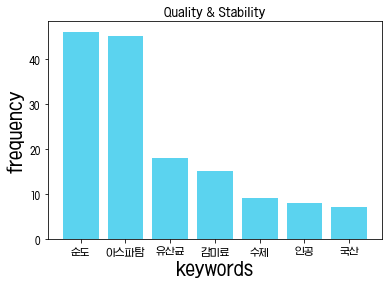

In [6]:
#  quality_stability
get_bar(quality_stability,"Quality & Stability",'#5BD3EF')

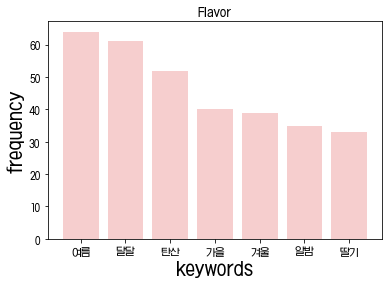

In [7]:
# flavor
get_bar(flavor,"Flavor",'#F6CECE')

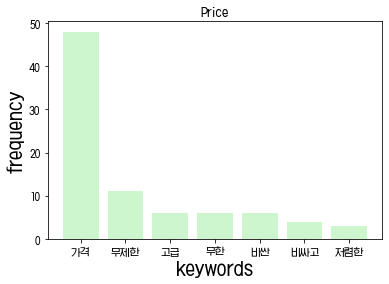

In [8]:
# price
get_bar(price,"Price",'#CEF6CE')

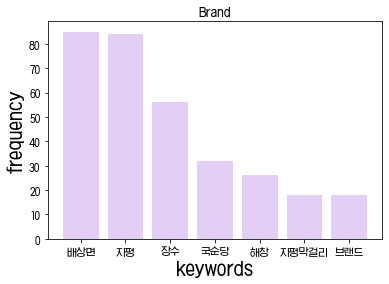

In [9]:
# brand
get_bar(brand,"Brand",'#E3CEF6')

### 전체 단어에서 속성별 차지하는 비율

In [10]:
# 1. 속성별 단어 개수 합치기

def sum_freq(data):
    cnt = 0
    for freq in data.values():
        cnt += freq
    return cnt

health_sum = sum_freq(health)
quality_stability_sum = sum_freq(quality_stability)
flavor_sum = sum_freq(flavor)
price_sum = sum_freq(price)
brand_sum = sum_freq(brand)

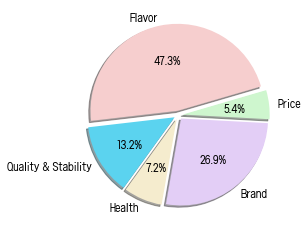

In [11]:
# 2. pie-chart 그리기
ratio = [health_sum,quality_stability_sum,flavor_sum,price_sum,brand_sum]
labels = ['Health', 'Quality & Stability', 'Flavor', 'Price','Brand']
explode = [0.05, 0.05, 0.05, 0.05,0.05]
colors = [health_color, quality_stability_color, flavor_color, price_color,brand_color]

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.savefig(f'pieChart.png', dpi=200, pad_inches=0.3,edgecolor='black')